<a href="https://colab.research.google.com/github/Noba21/Image-enhancement-technique/blob/main/image_negativity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install opencv-python


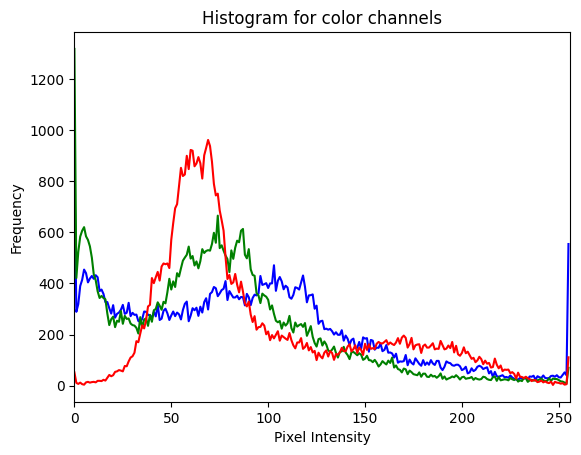

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests

# URL of the image
url = "https://th.bing.com/th/id/OIP.qQ6crR-CYpm5c4M4rVCMnQHaEK?w=312&h=180&c=7&r=0&o=5&pid=1.7"

# Download the image using requests
response = requests.get(url)
image_array = np.array(bytearray(response.content), dtype=np.uint8)
img_bgr = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Check if the image is loaded successfully
if img_bgr is None:
    print("Error: Could not load image.")
else:
    # Define color channels
    color = ('b', 'g', 'r')

    # Plot histograms for each color channel
    for i, col in enumerate(color):
        histr = cv2.calcHist([img_bgr], [i], None, [256], [0, 256])
        plt.plot(histr, color=col)
        plt.xlim([0, 256])

    # Show the histogram plot
    plt.title('Histogram for color channels')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()


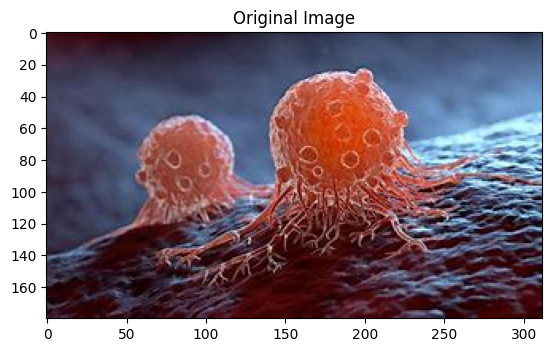

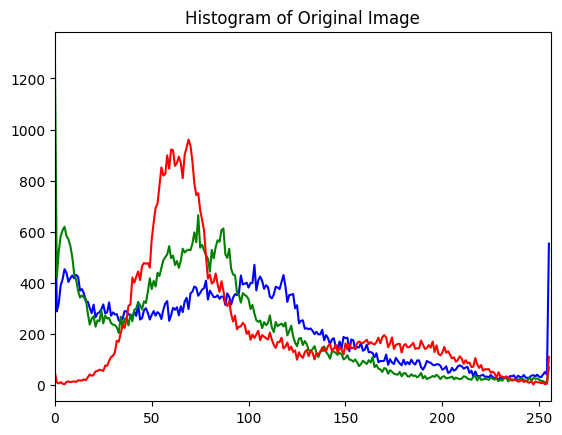

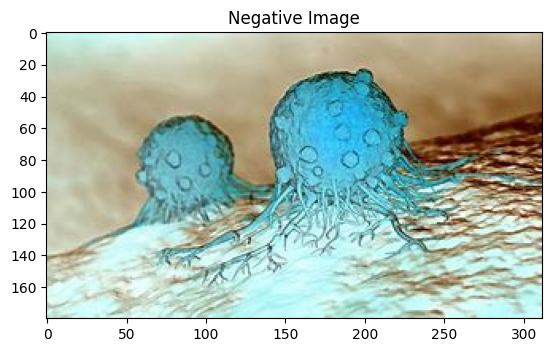

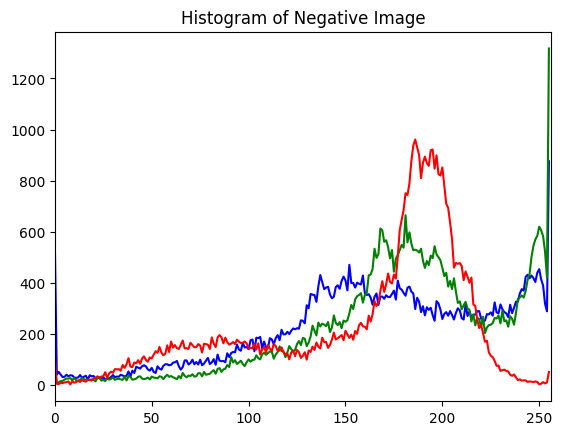

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests

# Step 1: Download the image from the URL
url = 'https://th.bing.com/th/id/OIP.qQ6crR-CYpm5c4M4rVCMnQHaEK?w=312&h=180&c=7&r=0&o=5&pid=1.7'
response = requests.get(url)
image_array = np.array(bytearray(response.content), dtype=np.uint8)
img_bgr = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Step 2: Display the original image
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

# Step 3: Plot histogram of the original image
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img_bgr], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.title("Histogram of Original Image")
plt.show()

# Step 4: Apply negative transformation to the image
height, width, _ = img_bgr.shape
for i in range(height):
    for j in range(width):
        # Subtract each pixel value from 255 for all channels
        img_bgr[i, j] = 255 - img_bgr[i, j]

# Display the negative-transformed image
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title("Negative Image")
plt.show()

# Step 5: Plot histogram of the negative-transformed image
for i, col in enumerate(color):
    histr = cv2.calcHist([img_bgr], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.title("Histogram of Negative Image")
plt.show()

